<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/Stock_NeurIPS2018_SB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version** 



# Content

* [1. Task Description](#0)
* [2. Install Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. A List of Python Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download and Preprocess Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5. Build Market Environment in OpenAI Gym-style](#4)  
    * [5.1. Data Split](#4.1)  
    * [5.3. Environment for Training](#4.2)    
* [6. Train DRL Agents](#5)
* [7. Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
  

<a id='0'></a>
# Part 1. Task Discription

We train a DRL agent for stock trading. This task is modeled as a Markov Decision Process (MDP), and the objective function is maximizing (expected) cumulative return.

We specify the state-action-reward as follows:

* **State s**: The state space represents an agent's perception of the market environment. Just like a human trader analyzing various information, here our agent passively observes many features and learns by interacting with the market environment (usually by replaying historical data).

* **Action a**: The action space includes allowed actions that an agent can take at each state. For example, a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying. When an action operates multiple shares, a ∈{−k, ..., −1, 0, 1, ..., k}, e.g.. "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy. For example, it can be the change of the portfolio value when taking a at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively


**Market environment**: 30 consituent stocks of Dow Jones Industrial Average (DJIA) index. Accessed at the starting date of the testing period.


The data for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


我们训练了一个用于股票交易的深度强化学习（DRL）智能体。这项任务被建模为一个马尔可夫决策过程（MDP），其目标函数是最大化（期望）累积收益。

我们按照以下方式定义状态-动作-奖励：

* **状态 s**：状态空间代表智能体对市场环境的感知。就像人类交易员分析各种信息一样，在这里我们的智能体被动地观察许多特征，并通过与市场环境的交互学习（通常是通过回放历史数据）。

* **动作 a**：动作空间包括智能体在每个状态下可以采取的允许动作。例如，a ∈ {−1, 0, 1}，其中−1、0、1分别代表卖出、持有和买入。当一个动作涉及多股股票时，a ∈{−k, ..., −1, 0, 1, ..., k}，例如，“购买10股AAPL”或“卖出10股AAPL”分别是10或−10。

* **奖励函数 r(s, a, s′)**：奖励是激励智能体学习更好策略的机制。例如，它可以是在状态 s 下采取动作 a 并到达新状态 s' 时的投资组合价值变化，即 r(s, a, s′) = v′ − v，其中 v′ 和 v 分别代表状态 s′ 和 s 下的投资组合价值。

**市场环境**：道琼斯工业平均指数（DJIA）的30只成分股。从测试期间的起始日期获取。

这个案例研究的数据来自雅虎财经API。数据包含开盘价、最高价、最低价、收盘价和成交量。

<a id='1'></a>
# Part 2. Install Python Packages

<a id='1.1'></a>
## 2.1. Install packages


In [2]:
## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install -q condacolab
# import condacolab
# condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

zsh:1: command not found: apt-get
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/pip-req-build-hdomtd6n
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/pip-req-build-hdomtd6n
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 50049b7d48ed4a71ac4dba93ad56f55d116bb0d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/pip-install-oj9htrtl/elegantrl_f478a19fecdd41458e48f57ea52b5014
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/pip-install-oj9htrtl/elegantrl_f


<a id='1.2'></a>
## 2.2. A list of Python packages 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Volumes/Repository/app/miniconda3/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [4]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



<a id='2'></a>
# Part 3. Download Data
Yahoo Finance provides stock data, financial news, financial reports, etc. Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** in FinRL-Meta to fetch data via Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).



-----
class YahooDownloader:
    Retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()


In [5]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [6]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-01'
TRADE_END_DATE = '2023-03-01'

In [7]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (97013, 8)


In [8]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [9]:
df.shape

(97013, 8)

In [10]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.470740,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,41.493408,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.192936,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.336727,7325600,CAT,0


# Part 4: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.
* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI.
* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the turbulence index that measures extreme fluctuation of asset price.

我们需要检查数据中是否存在缺失值，并进行特征工程以将数据点转换为状态。
* **添加技术指标**。在实际交易中，需要考虑各种信息，例如历史价格、当前持有的股票数量、技术指标等。在这里，我们展示了两个趋势跟踪的技术指标：MACD（移动平均收敛发散指标）和RSI（相对强弱指数）。
* **添加波动率指数**。风险厌恶反映了投资者是否倾向于保护资本。它也影响了人们在面对不同市场波动水平时的交易策略。为了在最坏的情况下控制风险，例如2007-2008年的金融危机，FinRL采用了波动率指数来衡量资产价格的极端波动。

In [11]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators


[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (3310, 8)
Successfully added vix
Successfully added turbulence index


In [12]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [13]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2010-01-04,AAPL,7.622500,7.660714,7.585000,6.470740,493729600.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,6.470740,6.470740,20.040001,0.0
1,2010-01-04,AMGN,56.630001,57.869999,56.560001,41.493408,5277400.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,41.493408,41.493408,20.040001,0.0
2,2010-01-04,AXP,40.810001,41.099998,40.389999,33.192936,6894300.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,33.192936,33.192936,20.040001,0.0
3,2010-01-04,BA,55.720001,56.389999,54.799999,43.777550,6186700.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,43.777550,43.777550,20.040001,0.0
4,2010-01-04,CAT,57.650002,59.189999,57.509998,40.336727,7325600.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,40.336727,40.336727,20.040001,0.0
5,2010-01-04,CRM,18.652500,18.882500,18.547501,18.680597,7906000.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,18.680597,18.680597,20.040001,0.0
6,2010-01-04,CSCO,24.110001,24.840000,24.010000,16.880302,59853700.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,16.880302,16.880302,20.040001,0.0
7,2010-01-04,CVX,78.199997,79.199997,78.160004,44.988235,10173800.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,44.988235,44.988235,20.040001,0.0
8,2010-01-04,DIS,32.500000,32.750000,31.870001,27.843178,13700400.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,27.843178,27.843178,20.040001,0.0
9,2010-01-04,GS,170.050003,174.250000,169.509995,135.576187,9135000.0,0.0,0.0,6.49216,6.46051,100.0,66.666667,100.0,135.576187,135.576187,20.040001,0.0


In [14]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

<a id='4'></a>
# Part 5. Build A Market Environment in OpenAI Gym-style
The training process involves observing stock price change, taking an action and reward's calculation. By interacting with the market environment, the agent will eventually derive a trading strategy that may maximize (expected) rewards.

Our market environment, based on OpenAI Gym, simulates stock markets with historical market data.

训练过程包括观察股票价格变化、采取行动和计算奖励。通过与市场环境的互动，智能体最终将推导出可能最大化（期望）奖励的交易策略。

我们的市场环境基于OpenAI Gym，使用历史市场数据模拟股票市场。在这样的模拟环境中，智能体可以通过不断尝试和学习，逐步理解和适应市场的运作机制，从而发展出有效的交易策略

## Data Split
We split the data into training set and testing set as follows:

Training data period: 2009-01-01 to 2020-07-01

Trading data period: 2020-07-01 to 2021-10-31


In [15]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
train_length = len(train)
trade_length = len(trade)
print(train_length)
print(trade_length)

85753
10237


In [16]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2956,2021-09-30,UNH,401.489990,403.489990,390.459991,377.353851,3779900.0,3.0,-4.283123,412.838062,380.981445,40.895385,-222.793938,41.980385,399.774955,399.273655,23.139999,24.872363
2956,2021-09-30,V,227.580002,228.789993,222.630005,218.542938,7128500.0,3.0,-1.526750,226.859188,214.843818,44.078979,-54.529646,19.569853,223.027284,229.677246,23.139999,24.872363
2956,2021-09-30,VZ,54.500000,54.509998,54.000000,46.361515,18736600.0,3.0,-0.221033,47.420592,46.108472,41.824857,-102.463406,21.682953,46.922905,47.420055,23.139999,24.872363
2956,2021-09-30,WBA,48.790001,48.930000,46.919998,41.084080,6449400.0,3.0,-0.236967,45.359592,40.747571,44.613731,-106.767192,0.941150,42.887237,41.925717,23.139999,24.872363
2956,2021-09-30,WMT,46.880001,47.243332,46.416668,44.720802,22457700.0,3.0,-0.510845,48.019577,44.562554,40.165865,-151.503082,45.479205,46.767856,46.406914,23.139999,24.872363


In [17]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-10-01,AAPL,141.899994,142.919998,139.110001,140.653519,94639600.0,4.0,-1.694440,154.557865,136.404112,46.927754,-142.221400,41.749873,146.390412,145.492820,21.1,120.123714
0,2021-10-01,AMGN,213.589996,214.610001,210.800003,197.213058,2629400.0,4.0,-2.996546,205.844865,192.892094,40.408562,-96.968329,36.189244,201.697201,210.039147,21.1,120.123714
0,2021-10-01,AXP,168.500000,175.119995,168.479996,168.247116,3956000.0,4.0,2.249025,172.356198,147.637366,56.265121,117.459909,15.667511,159.492024,161.711265,21.1,120.123714
0,2021-10-01,BA,222.850006,226.720001,220.600006,226.000000,9113600.0,4.0,0.730320,226.909442,205.727561,51.614047,116.649440,2.027170,217.175334,221.968500,21.1,120.123714
0,2021-10-01,CAT,192.899994,195.869995,191.240005,184.182983,3695500.0,4.0,-3.567776,201.635958,177.817143,41.999473,-112.157223,36.203176,193.068122,196.526050,21.1,120.123714


In [18]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [19]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [20]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## Environment for Training



In [21]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Train DRL Agents
* The DRL algorithms are from **Stable Baselines 3**. Users are also encouraged to try **ElegantRL** and **Ray RLlib**.
* FinRL includes fine-tuned standard DRL algorithms, such as DQN, DDPG, Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* 深度强化学习（DRL）算法来源于**Stable Baselines 3**。同时，也鼓励用户尝试**ElegantRL**和**Ray RLlib**等其他库。
* FinRL包含了经过微调的标准DRL算法，例如DQN（深度Q网络）、DDPG（深度确定性策略梯度）、多智能体DDPG、PPO（比例策略优化）、SAC（软演员-评论家）、A2C（优势演员-评论家）和TD3（双延迟深度确定性策略梯度）。我们也允许用户通过调整这些DRL算法来设计自己的DRL算法。

In [22]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True


### Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)


### Agent 1: A2C


In [23]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [24]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

----------------------------------------
| time/                 |              |
|    fps                | 191          |
|    iterations         | 100          |
|    time_elapsed       | 2            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -41.3        |
|    explained_variance | -0.579       |
|    learning_rate      | 0.0007       |
|    n_updates          | 99           |
|    policy_loss        | -80.6        |
|    reward             | -0.082661726 |
|    std                | 1            |
|    value_loss         | 5.04         |
----------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 192       |
|    iterations         | 200       |
|    time_elapsed       | 5         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -41.3     |
|    explained_variance | -0.00487  |
| 

### Agent 2: DDPG

In [25]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [26]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

day: 2956, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 5471677.96
total_reward: 4471677.96
total_cost: 1045.34
total_trades: 53243
Sharpe: 0.879
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 86         |
|    time_elapsed    | 136        |
|    total_timesteps | 11828      |
| train/             |            |
|    actor_loss      | 40.4       |
|    critic_loss     | 14.3       |
|    learning_rate   | 0.001      |
|    n_updates       | 11727      |
|    reward          | -8.1707735 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 87         |
|    time_elapsed    | 271        |
|    total_timesteps | 23656      |
| train/             |            |
|    actor_loss      | 14.7       |
|    critic_loss     | 4.22       |
|    learning_rate   | 0.001      |
|    n_updat

### Agent 3: PPO

In [27]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [28]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 230       |
|    iterations      | 1         |
|    time_elapsed    | 8         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 1.3377589 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 226         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017334236 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | -0.0085     |
|    learning_rate        | 0.00025     |
|    loss                 | 6.12        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0274     |
|    reward  

### Agent 4: TD3

In [29]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3


In [30]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000) if if_using_td3 else None

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 91        |
|    time_elapsed    | 129       |
|    total_timesteps | 11828     |
| train/             |           |
|    actor_loss      | 135       |
|    critic_loss     | 867       |
|    learning_rate   | 0.001     |
|    n_updates       | 11727     |
|    reward          | -8.872578 |
----------------------------------
day: 2956, episode: 60
begin_total_asset: 1000000.00
end_total_asset: 4988083.50
total_reward: 3988083.50
total_cost: 1128.16
total_trades: 50229
Sharpe: 0.882
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 90        |
|    time_elapsed    | 261       |
|    total_timesteps | 23656     |
| train/             |           |
|    actor_loss      | 78.7      |
|    critic_loss     | 17        |
|    learning_rate   | 0.001     |
|    n_updates       | 23555     |


### Agent 5: SAC

In [31]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [32]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000) if if_using_sac else None

-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 77         |
|    time_elapsed    | 152        |
|    total_timesteps | 11828      |
| train/             |            |
|    actor_loss      | 173        |
|    critic_loss     | 14.1       |
|    ent_coef        | 0.0935     |
|    ent_coef_loss   | -111       |
|    learning_rate   | 0.0001     |
|    n_updates       | 11727      |
|    reward          | -5.3410826 |
-----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 78        |
|    time_elapsed    | 299       |
|    total_timesteps | 23656     |
| train/             |           |
|    actor_loss      | 56.5      |
|    critic_loss     | 66.4      |
|    ent_coef        | 0.0288    |
|    ent_coef_loss   | -155      |
|    learning_rate   | 0.0001    |
|    n_updates       | 23555     |
|    

## In-sample Performance

Assume that the initial capital is $1,000,000.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

将波动率阈值设置为大于样本内波动数据的最大值。如果当前的波动率指数大于这个阈值，那么我们认为当前市场是不稳定的

In [33]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [34]:
insample_risk_indicator.vix.describe()

count    2957.000000
mean       18.105293
std         7.272476
min         9.140000
25%        13.370000
50%        16.209999
75%        20.629999
max        82.690002
Name: vix, dtype: float64

In [35]:
insample_risk_indicator.vix.quantile(0.996)

57.212001831054636

In [36]:
insample_risk_indicator.turbulence.describe()

count    2957.000000
mean       34.139583
std        43.879064
min         0.000000
25%        14.613571
50%        23.644651
75%        38.292890
max       652.503886
Name: turbulence, dtype: float64

In [37]:
insample_risk_indicator.turbulence.quantile(0.996)

291.725975117411

### Trading (Out-of-sample Performance)

We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

为了充分利用数据，我们会定期进行更新，例如每季度、每月或每周重新训练模型。在此过程中，我们也会调整参数。在这个笔记本中，我们使用2009年1月至2020年7月的样本内数据一次性调整参数，因此随着交易时间段的延长，这里存在一定的阿尔法衰减。

众多的超参数——例如学习率、训练样本的总数——会影响学习过程，并且通常通过测试一些变化来确定。

In [38]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [39]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-10-01,AAPL,141.899994,142.919998,139.110001,140.653519,94639600.0,4.0,-1.694440,154.557865,136.404112,46.927754,-142.221400,41.749873,146.390412,145.492820,21.1,120.123714
0,2021-10-01,AMGN,213.589996,214.610001,210.800003,197.213058,2629400.0,4.0,-2.996546,205.844865,192.892094,40.408562,-96.968329,36.189244,201.697201,210.039147,21.1,120.123714
0,2021-10-01,AXP,168.500000,175.119995,168.479996,168.247116,3956000.0,4.0,2.249025,172.356198,147.637366,56.265121,117.459909,15.667511,159.492024,161.711265,21.1,120.123714
0,2021-10-01,BA,222.850006,226.720001,220.600006,226.000000,9113600.0,4.0,0.730320,226.909442,205.727561,51.614047,116.649440,2.027170,217.175334,221.968500,21.1,120.123714
0,2021-10-01,CAT,192.899994,195.869995,191.240005,184.182983,3695500.0,4.0,-3.567776,201.635958,177.817143,41.999473,-112.157223,36.203176,193.068122,196.526050,21.1,120.123714


In [40]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [41]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [42]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [43]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [44]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [45]:
df_account_value_a2c.shape

(353, 2)

<a id='7'></a>
# Part 6.5: Mean Variance Optimization

Mean Variance optimization is a very classic strategy in portfolio management. Here, we go through the whole process to do the mean variance optimization and add it as a baseline to compare.

First, process dataframe to the form for MVO weight calculation.

均值-方差优化是投资组合管理中一个非常经典的策略。在这里，我们将经历整个均值-方差优化（Mean Variance Optimization, MVO）的过程，并将其实现为一个基准线，用于后续的比较。

首先，处理数据框架（DataFrame）为适合进行MVO权重计算的格式。

进行均值-方差优化的步骤通常包括以下几个方面：

1. **预期收益的计算**：基于历史数据，计算每个资产或一组资产的平均收益率。这通常涉及到对过去价格变动的统计分析。

2. **协方差的计算**：计算资产之间的协方差矩阵，以了解资产收益之间的相关性。协方差矩阵是MVO中一个关键的部分，因为它决定了资产组合的风险分散效果。

3. **风险偏好的设定**：确定投资者的风险偏好，这通常通过选择一个合适的风险水平（例如，方差或标准差）来实现。投资者可能更倾向于较低的风险水平，因此愿意接受较低的预期收益。

4. **优化问题的求解**：使用数学优化方法（如拉格朗日乘数法）来求解在给定风险水平下最大化预期收益的投资组合权重。这个过程会得到一组权重，使得投资组合的预期收益最大化，同时满足投资者的风险约束。

5. **结果的验证与调整**：在得到优化结果后，需要对其进行验证，确保所得到的投资组合权重是合理的，并且符合投资者的风险偏好。必要时，可以对权重进行调整以适应特定的投资目标或限制。

通过以上步骤，我们可以得到一个理论上最优的投资组合，它在满足特定风险水平的前提下，实现了预期收益的最大化。这个投资组合可以作为基准，与通过深度强化学习算法得到的投资策略进行比较，从而评估算法的有效性和潜在的优势。
在实际操作中，均值-方差优化需要依赖于准确的历史数据和合理的预期收益估计。此外，由于市场环境的变化，投资组合可能需要定期重新优化以适应新的市场条件。通过将MVO作为基准线，我们可以更好地理解和评估深度强化学习算法在实际交易中的表现。

In [46]:
def process_df_for_mvo(df):
  df = df.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
  fst = df
  fst = fst.iloc[0:stock_dimension, :]
  tic = fst['tic'].tolist()

  mvo = pd.DataFrame()

  for k in range(len(tic)):
    mvo[tic[k]] = 0

  for i in range(df.shape[0]//stock_dimension):
    n = df
    n = n.iloc[i * stock_dimension:(i+1) * stock_dimension, :]
    date = n['date'][i*stock_dimension]
    mvo.loc[date] = n['close'].tolist()
  
  return mvo

### Helper functions for mean returns and variance-covariance matrix

均值收益和协方差矩阵的辅助函数
在进行均值-方差优化（MVO）时，计算均值收益和协方差矩阵是两个关键步骤。

In [47]:
# Codes in this section partially refer to Dr G A Vijayalakshmi Pai

# https://www.kaggle.com/code/vijipai/lesson-5-mean-variance-optimization-of-portfolios/notebook

def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

### Calculate the weights for mean-variance

均值-方差优化（Mean-Variance Optimization, MVO）是一种基于现代投资组合理论的方法，旨在构建一个投资组合，使其在给定的风险水平下实现最大的预期收益，或者在给定的预期收益水平下实现最小的风险。为了进行MVO，我们需要计算投资组合的预期收益和协方差矩阵，并使用这些信息来确定最优权重。

以下是计算均值-方差优化权重的一般步骤：

计算预期收益：基于历史数据，计算每个资产的预期收益率。这通常通过对历史收益率数据进行平均来实现。

计算协方差矩阵：计算资产之间的协方差矩阵，以了解资产收益之间的相关性。协方差矩阵可以帮助我们评估组合的整体风险。

确定投资约束和目标：设定投资组合的约束条件，如资产权重的上下限、总和等于1等。同时，明确投资目标，例如最大化预期收益或最大化夏普比率。

求解优化问题：使用数学优化方法，如二次规划，来求解在约束条件下的最优权重。这通常涉及到构建一个目标函数（例如，预期收益的线性组合减去风险的二次项），并找到最大化或最小化该目标函数的权重。

结果分析和调整：分析优化结果，确保权重符合实际投资需求和市场情况。必要时，可以对权重进行调整以适应特定的投资策略或市场变化。

In [48]:
train_mvo = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE).reset_index()
trade_mvo = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE).reset_index()

In [49]:
StockData = process_df_for_mvo(train_mvo)
TradeData = process_df_for_mvo(trade_mvo)

TradeData.to_numpy()

array([[140.65351868, 197.21305847, 168.24711609, ...,  46.61045456,
         40.86577988,  43.97320557],
       [137.19261169, 194.92675781, 167.00900269, ...,  46.7821312 ,
         40.7697258 ,  43.54967499],
       [139.1350708 , 195.31394958, 169.0402832 , ...,  46.79071808,
         41.1190033 ,  43.83524323],
       ...,
       [148.60676575, 229.88821411, 172.62794495, ...,  35.85334015,
         33.8431778 ,  46.49341965],
       [145.93106079, 226.05708313, 171.75073242, ...,  36.04875183,
         33.45998383,  46.61775589],
       [147.13464355, 226.82136536, 170.81434631, ...,  36.17902756,
         33.07677841,  46.2807312 ]])

In [50]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [0.12  0.065 0.07  0.08  0.068 0.116 0.051 0.039 0.073 0.049 0.102 0.078
 0.024 0.06  0.048 0.072 0.039 0.064 0.045 0.048 0.096 0.092 0.046 0.058
 0.104 0.094 0.043 0.034 0.048]
Variance-Covariance matrix of returns
 [[3.14  1.017 1.294 1.529 1.374 1.696 1.379 1.13  1.092 1.377 1.165 1.224
  1.035 1.526 0.693 1.272 0.667 0.819 1.032 0.737 1.579 1.145 0.672 0.863
  1.146 1.34  0.526 0.909 0.635]
 [1.017 2.406 1.076 1.016 1.067 1.218 1.027 0.967 0.938 1.128 0.984 1.032
  0.851 1.155 0.892 1.143 0.643 0.668 0.909 1.074 1.092 0.879 0.727 0.855
  1.147 1.058 0.629 1.027 0.648]
 [1.294 1.076 3.307 2.486 1.912 1.575 1.435 1.926 1.721 2.24  1.382 1.859
  1.342 1.534 0.866 2.37  0.994 1.082 1.384 0.959 1.362 1.424 0.73  1.509
  1.416 1.802 0.75  1.223 0.586]
 [1.529 1.016 2.486 4.984 2.129 1.698 1.518 2.153 1.845 2.214 1.537 2.132
  1.536 1.706 0.911 2.308 1.123 1.201 1.47  0.947 1.444 1.583 0.752 1.613
  1.483 1.722 0.738 1.374 0.609]
 [1.374 1.067 1.91

### Use PyPortfolioOpt

In [51]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(29)])
mvo_weights

array([288130.,      0.,      0.,      0.,      0.,  69330.,      0.,
            0.,      0.,      0., 316160.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
        66290.,      0.,      0., 237410.,  22690.,      0.,      0.,
            0.])

In [52]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([2065.158,    0.   ,    0.   ,    0.   ,    0.   ,  255.957,
          0.   ,    0.   ,    0.   ,    0.   , 1025.138,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,    0.   ,  469.828,    0.   ,    0.   ,
        629.144,  103.824,    0.   ,    0.   ,    0.   ])

In [53]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
# MVO_result

<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

回测是评估交易策略性能的关键环节。自动化回测工具受到青睐，因为它减少了人为错误。我们通常使用Quantopian的pyfolio包来回测我们的交易策略。这个工具易于使用，并包含各种单独的图表，提供了对交易策略性能的全面展示。

在进行回测时，我们关注的主要指标包括但不限于：

累计收益：衡量策略从开始到结束的总收益。
最大回撤：策略在任何给定时间点上的最大损失。
夏普比率：衡量单位风险下的超额收益，即策略收益与无风险收益之差与策略波动率的比值。
胜率：策略获利交易与总交易次数的比例。
交易频率：策略产生交易的频率。
持仓分布：策略在不同资产上的投资比例。
使用pyfolio进行回测的基本步骤如下：

准备数据：确保你的交易数据是准确和完整的，包括交易时间、价格、数量等信息。
设置pyfolio：创建一个pyfolio的Portfolio对象，并传入你的交易数据。
生成回测报告：调用portfolio.create_report()方法生成回测报告。
分析结果：查看生成的图表和统计数据，分析策略的性能。

In [54]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_a2c.rename(columns = {'account_value':'a2c'}, inplace = True)
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_ddpg.rename(columns = {'account_value':'ddpg'}, inplace = True)
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_td3.rename(columns = {'account_value':'td3'}, inplace = True)
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_ppo.rename(columns = {'account_value':'ppo'}, inplace = True)
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
df_result_sac.rename(columns = {'account_value':'sac'}, inplace = True)
df_account_value_a2c.to_csv("df_account_value_a2c.csv")
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI", 
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("df_dji+.csv")

result = pd.DataFrame()
result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)
result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True)
result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True)
result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True)
result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True)
result = pd.merge(result, MVO_result, how='outer', left_index=True, right_index=True)
print(result.head())
result = pd.merge(result, df_dji, how='outer', left_index=True, right_index=True)
# result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mean var', 'dji']

# print("result: ", result)
result.to_csv("result.csv")

==============Get Baseline Stats===========


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (354, 8)
Annual return         -0.034876
Cumulative returns    -0.048644
Annual volatility      0.181612
Sharpe ratio          -0.105351
Calmar ratio          -0.158953
Stability              0.280983
Max drawdown          -0.219408
Omega ratio            0.982546
Sortino ratio         -0.146974
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.970602
Daily value at risk   -0.022957
dtype: float64
                     a2c          ddpg           td3           ppo  \
date                                                                 
2021-10-01  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
2021-10-04  9.984819e+05  9.962621e+05  9.981736e+05  9.997737e+05   
2021-10-05  1.000429e+06  1.002821e+06  1.002439e+06  1.000319e+06   
2021-10-06  1.002289e+06  1.007031e+06  1.004032e+06  1.000648e+06   
2021-10-07  1.008054e+06  1.018193e+06  1.012681e+06  1.001747e+06   

                     sac      Mean Var  
date   

In [55]:
df_result_ddpg

,ddpg
date,
2021-10-01,1.000000e+06
2021-10-04,9.962621e+05
2021-10-05,1.002821e+06
2021-10-06,1.007031e+06
2021-10-07,1.018193e+06
...,...
2023-02-21,9.792242e+05
2023-02-22,9.764734e+05
2023-02-23,9.799027e+05


<Figure size 1500x500 with 0 Axes>

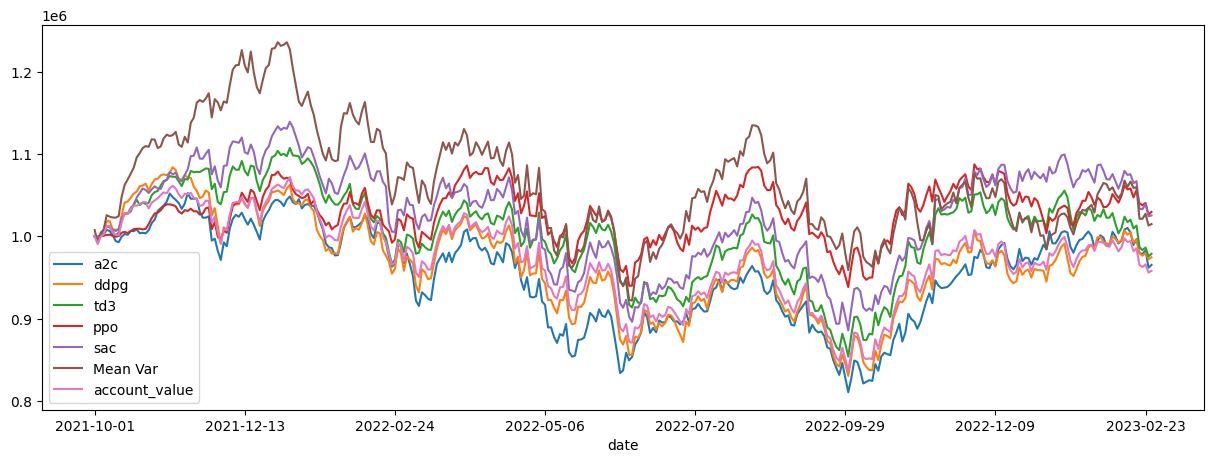

In [56]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();